In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/IMDB Dataset.csv")

In [3]:
dfcopy=df.copy()

In [4]:
dfcopy

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
dfcopy.columns

Index(['review', 'sentiment'], dtype='object')

In [6]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
dfcopy["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Check Duplicates

In [8]:
dfcopy.duplicated().sum()

418

In [9]:
dfcopy=dfcopy.drop_duplicates()

In [10]:
dfcopy.duplicated().sum()

0

Check null values

In [11]:
dfcopy.isnull().sum()

review       0
sentiment    0
dtype: int64

In [12]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [13]:
dfcopy["sentiment"].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

Visualize Sentiment Column

<Axes: xlabel='sentiment', ylabel='count'>

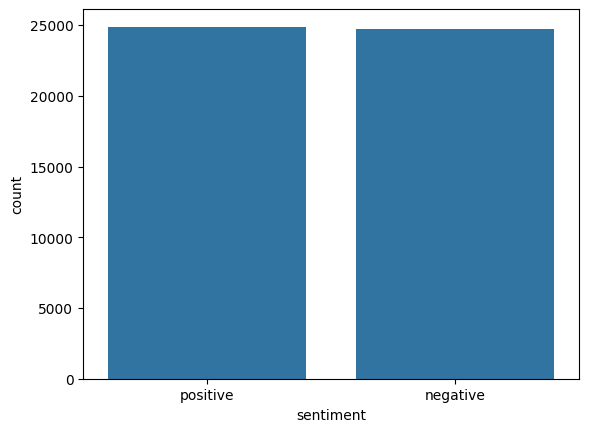

In [14]:
sns.countplot(data=dfcopy,x="sentiment")

Handle Categorical Variables in sentiment column

In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
dfcopy["sentiment"]=le.fit_transform(dfcopy["sentiment"])

<ipython-input-17-943ae9425d54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy["sentiment"]=le.fit_transform(dfcopy["sentiment"])


In [18]:
dfcopy

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [19]:
dfcopy["sentiment"].value_counts()

sentiment
1    24884
0    24698
Name: count, dtype: int64

preprocessing in review column

In [20]:
#1-clean html tags
import re
def remove_html_tags(text):
  clean=re.compile('<.*?>')
  return re.sub(clean,"", text)

In [21]:
dfcopy["review"]=dfcopy["review"].apply(remove_html_tags)

<ipython-input-21-6eaa8cb2017d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy["review"]=dfcopy["review"].apply(remove_html_tags)


In [22]:
dfcopy

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [23]:
#2-convert into lower case
def convert_to_lower(text):
    return text.lower()

In [24]:
dfcopy["review"]=dfcopy["review"].apply(convert_to_lower)

<ipython-input-24-8ac68272c6ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy["review"]=dfcopy["review"].apply(convert_to_lower)


In [25]:
dfcopy

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1
...,...,...
49995,i thought this movie did a down right good job...,1
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0
49997,i am a catholic taught in parochial elementary...,0
49998,i'm going to have to disagree with the previou...,0


In [26]:
#3-remove special characters
def remove_special_characters(text):
    pattern=r'[^a-zA-Z0-9\s]'
    return re.sub(pattern,'',text)

In [27]:
dfcopy["review"]=dfcopy["review"].apply(remove_special_characters)

<ipython-input-27-83aeea1a35fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy["review"]=dfcopy["review"].apply(remove_special_characters)


In [28]:
dfcopy

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1
...,...,...
49995,i thought this movie did a down right good job...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,i am a catholic taught in parochial elementary...,0
49998,im going to have to disagree with the previous...,0


In [29]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
#4-word tokenization
def word_token(text):
  return word_tokenize(text)

In [31]:
dfcopy["review"]=dfcopy["review"].apply(word_token)

<ipython-input-31-20ae61ec8932>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy["review"]=dfcopy["review"].apply(word_token)


In [32]:
dfcopy

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",1
1,"[a, wonderful, little, production, the, filmin...",1
2,"[i, thought, this, was, a, wonderful, way, to,...",1
3,"[basically, theres, a, family, where, a, littl...",0
4,"[petter, matteis, love, in, the, time, of, mon...",1
...,...,...
49995,"[i, thought, this, movie, did, a, down, right,...",1
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",0
49997,"[i, am, a, catholic, taught, in, parochial, el...",0
49998,"[im, going, to, have, to, disagree, with, the,...",0


In [33]:
import nltk
from nltk.corpus import stopwords

In [34]:
nltk.download('stopwords')
stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
#5-remove stopwords
def remove_stopwords(text):
  x=[]
  for i in text:
    if i not in stopwords.words("english"):
      x.append(i)
  y=x[:]
  x.clear()
  return y

In [36]:
dfcopy["review"]=dfcopy["review"].apply(remove_stopwords)

<ipython-input-36-4e3618e1dc4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy["review"]=dfcopy["review"].apply(remove_stopwords)


In [37]:
dfcopy

,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, theres, family, little, boy, jake,...",0
4,"[petter, matteis, love, time, money, visually,...",1
...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",1
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",0
49997,"[catholic, taught, parochial, elementary, scho...",0
49998,"[im, going, disagree, previous, comment, side,...",0


In [38]:
#6-stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def stemming(text):
  x=[]
  for i in text:
    x.append(ps.stem(i))
  y=x[:]
  x.clear()
  return y

In [39]:
dfcopy["review"]=dfcopy["review"].apply(stemming)

<ipython-input-39-f1c29dedbb72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy["review"]=dfcopy["review"].apply(stemming)


In [40]:
dfcopy

,review,sentiment
0,"[one, review, mention, watch, 1, oz, episod, y...",1
1,"[wonder, littl, product, film, techniqu, unass...",1
2,"[thought, wonder, way, spend, time, hot, summe...",1
3,"[basic, there, famili, littl, boy, jake, think...",0
4,"[petter, mattei, love, time, money, visual, st...",1
...,...,...
49995,"[thought, movi, right, good, job, wasnt, creat...",1
49996,"[bad, plot, bad, dialogu, bad, act, idiot, dir...",0
49997,"[cathol, taught, parochi, elementari, school, ...",0
49998,"[im, go, disagre, previou, comment, side, malt...",0


In [41]:
def join_back(list_input):
  return " ".join(list_input)

In [42]:
dfcopy["review"]=dfcopy["review"].apply(join_back)

<ipython-input-42-9236fe17a346>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcopy["review"]=dfcopy["review"].apply(join_back)


In [43]:
dfcopy

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1
...,...,...
49995,thought movi right good job wasnt creativ orig...,1
49996,bad plot bad dialogu bad act idiot direct anno...,0
49997,cathol taught parochi elementari school nun ta...,0
49998,im go disagre previou comment side maltin one ...,0


Word Cloud

In [ ]:
!pip install wordcloud

In [44]:
from wordcloud import WordCloud

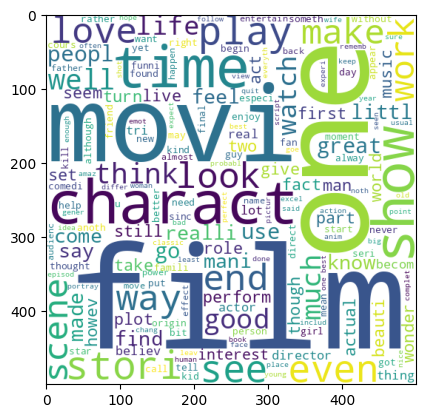

In [45]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")
spam_wc=wc.generate(dfcopy[dfcopy["sentiment"]==1]["review"].str.cat(sep=" "))
plt.imshow(spam_wc)

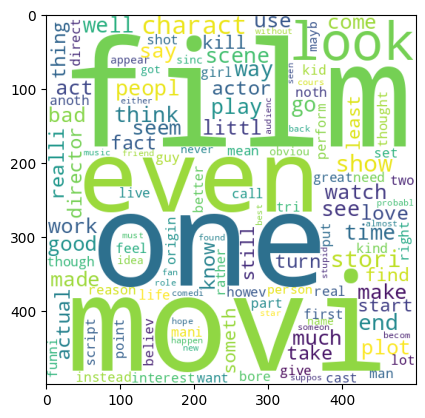

In [46]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")
spam_wc1=wc.generate(dfcopy[dfcopy["sentiment"]==0]["review"].str.cat(sep=" "))
plt.imshow(spam_wc1)

specify input/output columns

In [47]:
X=dfcopy[["review"]]

In [48]:
X.shape

(49582, 1)

In [49]:
y=dfcopy["sentiment"]

In [50]:
y.shape

(49582,)

Text Vectorization

->**By using CountVectorizer:**
**max features(3500**) gnb:74%, mnb:84%, bnb:84%
**max features(2000)** gnb:75%, mnb:83%, bnb:83%, xgb:85%, lr:87%
->**By using tfidfVectorizer:**
**max features(3000)** xgb:85%, lr:88%
**max features(3500)** gnb:79%, mnb:84%, bnb:84%, xgb:85%, lr:88%
**max features(4500)** gnb:79% ,mnb:85%,bnb:85%,xgb:85%,lr:89%
**max features(5000)** gnb:78%,mnb:84%, bnb:84%, xgb:85%, lr:88%


In [93]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# cv=CountVectorizer(max_features=2000)
tfidf=TfidfVectorizer(max_features=4500)
# X=cv.fit_transform(dfcopy["review"]).toarray()
X=tfidf.fit_transform(dfcopy["review"]).toarray()

In [94]:
X.shape

(49582, 4500)

Train Test Split

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [96]:
X_train.shape

(39665, 4500)

In [97]:
X_test.shape

(9917, 4500)

In [98]:
y_train.value_counts()

sentiment
1    19977
0    19688
Name: count, dtype: int64

In [99]:
y_test.value_counts()

sentiment
0    5010
1    4907
Name: count, dtype: int64

Naive Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [101]:
pred=gnb.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [103]:
print("accuracy using gnb:", accuracy_score(y_test,pred))

accuracy using gnb: 0.7952001613391146


In [104]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [105]:
pred1=mnb.predict(X_test)

In [106]:
print("testing accuracy using mnb:", accuracy_score(y_test,pred1))


testing accuracy using mnb: 0.8531814056670364


In [107]:
cm=confusion_matrix(y_test,pred1)
cm

array([[4231,  779],
       [ 677, 4230]])

In [108]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB()

In [109]:
pred2=bnb.predict(X_test)

In [110]:
print("accuracy using bnb:", accuracy_score(y_test,pred2))

accuracy using bnb: 0.8517696884138348


XGB classifier

In [111]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [112]:
pred3=model_xgb.predict(X_test)

In [113]:
print("accuracy using xgb:", accuracy_score(y_test,pred3))

accuracy using xgb: 0.8579207421599274


Hyperparameter Tuning using Grid Search Cv

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid={
#     'max_depth':[3,4,5],
#     'learning_rate':[0.01,0.1,0.2],
#     'n_estimators':[50,100,200]
# }
# grid_search=GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# print("Best hyperparameters:", grid_search.best_params_)
# print("Best model accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Best model accuracy: 0.8578343627883525


Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [116]:
y_pred=lr.predict(X_test)

In [117]:
print("Accuracy using logistic Regression:", accuracy_score(y_pred,y_test))

Accuracy using logistic Regression: 0.8905919128768781


In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      5010
           1       0.87      0.91      0.89      4907

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



In [118]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[4368,  443],
       [ 642, 4464]])